In [118]:
# Import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import yfinance as yf
import pandas_datareader as pdr

import datetime as dt

from arch import arch_model
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR

             Price     NFCI  NFCI_diff  Price_pct_diff
2004-04-16  1.3400 -0.78186    0.02427       -0.005197
2004-04-23  1.2440 -0.76524    0.01662       -0.071642
2004-04-30  1.2075 -0.74768    0.01756       -0.029341
2004-05-07  1.1905 -0.73030    0.01738       -0.014079
2004-05-14  1.1780 -0.71586    0.01444       -0.010500


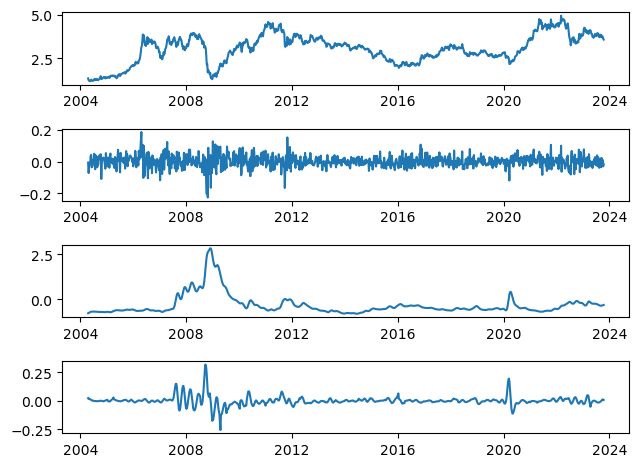

In [119]:
# Initialize dates
end = dt.datetime.now()
timedelta = dt.timedelta(20 * 365)
start = end - timedelta


# Download and clean datasets
df = pd.read_csv(r"C:\Users\adevr\ra_forecaster\Historical\Copper Futures Historical Data.csv")
df_nfci = pdr.DataReader('NFCI', 'fred', start, end)

df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)
df = df[["Price"]]
df = df.dropna()
df = df.sort_index()

# print(df.head())

df_merged = pd.merge(df, df_nfci, left_index=True, right_index=True, how='inner')
df_merged["NFCI_diff"] = df_merged["NFCI"].diff()
df_merged["Price_pct_diff"] = df_merged["Price"].pct_change()
df_merged = df_merged.dropna()
print(df_merged.head())

# Plot the dataframe
fig, axs = plt.subplots(4, 1)
fig.tight_layout()
axs[0].plot(df_merged["Price"])
axs[1].plot(df_merged["Price_pct_diff"])
axs[2].plot(df_merged["NFCI"])
axs[3].plot(df_merged["NFCI_diff"])